In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

## TASK 3: loading data into the Jupyter Notebook

In [29]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [30]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [31]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


## Task 4: Generate Descriptive Statistics and Visualizations

For the "Median value of owner-occupied homes" provide a **boxplot**

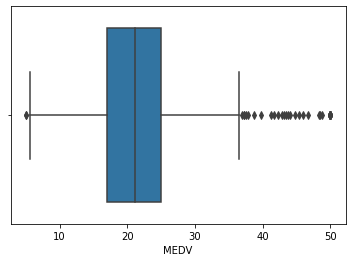

In [32]:
ax = sns.boxplot(x = 'MEDV', data=boston_df)

Provide a  **histogram** for the Charles river variable

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Histogram of CHAS')

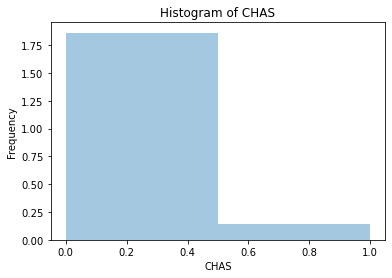

In [33]:
ax = sns.distplot(boston_df['CHAS'], bins=2, hist=True)
plt.xlabel("CHAS", fontsize = 10)
plt.ylabel("Frequency", fontsize = 10)
plt.title("Histogram of CHAS")

Provide a **boxplot** for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [37]:
boston_df.loc[(boston_df['AGE'] <= 35), 'AGE_ADJ'] = '<=35'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'AGE_ADJ'] = '35-70'
boston_df.loc[(boston_df['AGE'] >= 70), 'AGE_ADJ'] = '>=70'

In [38]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,AGE_ADJ
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,35-70
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,>=70
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,35-70
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,35-70
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,35-70


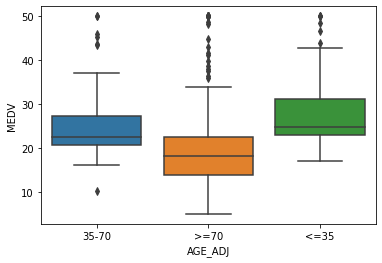

In [39]:
ax = sns.boxplot(x='AGE_ADJ', y='MEDV', data=boston_df)

Provide a **scatter plot** to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

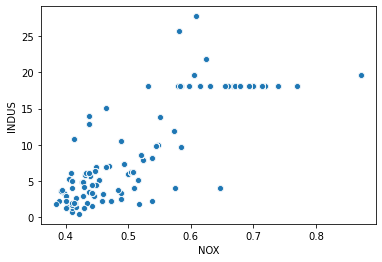

In [40]:
ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)

**ANSWER TO QUESTION**: The proportion of non-retail business acres per town increases with increasing nitric oxide concentrations that is, there is a positive correlation between the two variables.

Create a **histogram** for the pupil to teacher ratio variable

Text(0.5, 1.0, 'Histogram of PTRATIO')

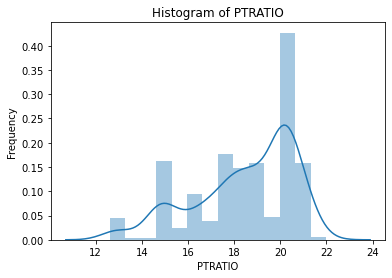

In [41]:
ax = sns.distplot(boston_df['PTRATIO'], hist=True)
plt.xlabel("PTRATIO", fontsize = 10)
plt.ylabel("Frequency", fontsize = 10)
plt.title("Histogram of PTRATIO")

## Task 5: Use the appropriate tests to answer the questions provided.

In [42]:
import scipy.stats

### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

State the hypothesis

-   $H_0: µ_1 = µ_2$ ("there is no difference in houses' median values whether it's bounded by Charles river or not")
-   $H_1: µ_1 ≠ µ_2$ ("there is a difference in houses' median values depending whether it's bounded by Charles river or not")

We can plot the dependent variable with a historgram

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Normal Distribution')]

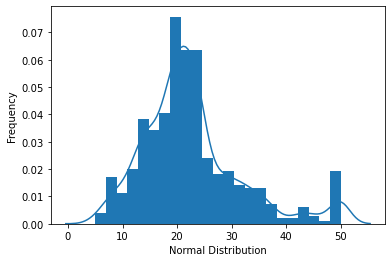

In [43]:
ax = sns.distplot(boston_df['MEDV'],
                  kde=True,
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')
## we can assume it is normal

We can use the Levene's Test in Python to check test significance

In [45]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], center='mean')

# since the p-value is less than 0.05 we can not assume equality of variance

LeveneResult(statistic=8.751904896045998, pvalue=0.003238119367639829)

In [51]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = False)

Ttest_indResult(statistic=3.113291312794837, pvalue=0.003567170098137517)

**Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in value of houses based on whether it's bounded by Charlуs River or not

### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

State the hypothesis

-   $H_0: µ_1 = µ_2 = µ_3$ (the three population means are equal)
-   $H_1:$ At least one of the means differ


Test for equality of variance

In [52]:
scipy.stats.levene(boston_df[boston_df['AGE_ADJ'] == '<=35']['MEDV'],
                   boston_df[boston_df['AGE_ADJ'] == '35-70']['MEDV'], 
                   boston_df[boston_df['AGE_ADJ'] == '>=70']['MEDV'], 
                   center='mean')
# since the p-value is more than 0.05, the variance are equal

LeveneResult(statistic=2.780620029374844, pvalue=0.06295337343259205)

First, separate the three samples (one for each job category) into a variable each.

In [54]:
thirtyfive_lower = boston_df[boston_df['AGE_ADJ'] == '<=35']['MEDV']
thirtyfive_seventy = boston_df[boston_df['AGE_ADJ'] == '35-70']['MEDV']
seventy_older = boston_df[boston_df['AGE_ADJ'] == '>=70']['MEDV']

Now, run a one-way ANOVA.

In [55]:
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion:** Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.


### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

State the hypothesis:

-   $H_0:$ Nitric oxide concentrations are not correlated with proportion of non-retail business acres per town
-   $H_1:$ Nitric oxide concentrations are correlated with proportion of non-retail business acres per town


First, we draw a scatter plot to visualize and anticipate the data.

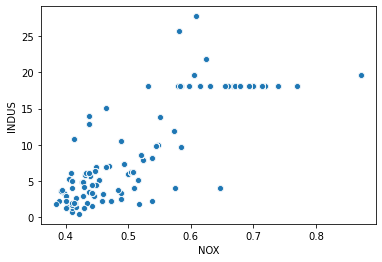

In [57]:
ax = sns.scatterplot(x="NOX", y="INDUS", data=boston_df)

*From scatter we can anticipate upward positive correlation, but to be sure we need to perform Pearson test using pearsonr function*

In [58]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.7636514469209155, 7.913361061236445e-98)

**Conclusion:** Since the p-value  < 0.05, we reject  the Null hypothesis and conclude that there  exists a relationship between  nitric oxide concentrations and proportion of non-retail business acres per town


### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [59]:
import statsmodels.api as sm

State the hypothesis:
-   $H_0: β1$ = 0 (weighted distance to the five Boston employment centres has no effect on the median value of owner occupied homes)
-   $H_1: β1$ is not equal to 0 (weighted distance to the five Boston employment centres has an effect on the median value of owner occupied homes)

In [60]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 29 Mar 2021   Prob (F-statistic):           1.21e-08
Time:                        17:14:16   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** The p-value is less than the alpha (α) level = 0.05, so we reject the null hypothesis as there is evidence that there is a difference in median value of owner occupied homes based on weighted distance to the five Boston employment centres. The coefficient 1.0916 is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes.